In [1]:
from sklearn import datasets

In [2]:
mnist=datasets.load_digits()

In [3]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
mnist.data.shape #1797개 이미지, 각 이미지당 64개의 픽셀

(1797, 64)

In [5]:
mnist.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [6]:
mnist.images.shape #1797개 이미지, 8개 행, 8개 열로 구성

(1797, 8, 8)

In [7]:
mnist.images[0] # 0부분은 검은색 클수록 흰색

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

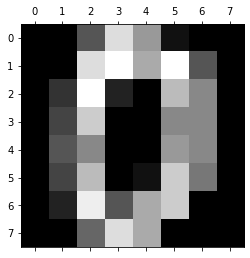

In [16]:
plt.gray()
plt.matshow(mnist.images[0])

In [17]:
mnist.target # 정답

array([0, 1, 2, ..., 8, 9, 8])

In [24]:
features=mnist.data

In [32]:
labels=mnist.target

In [28]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd


In [34]:
def mycv(classfier, features, labels):
    cv_scores=[]
    for i in range(10):
        scores=cross_val_score(classfier, features, labels, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())

    return cv_scores #평균 교차 검증 점확도

In [35]:
mycv(tree.DecisionTreeClassifier(), features, labels)

[0.8196834264432029,
 0.8213594040968342,
 0.8235692116697703,
 0.8291713221601489,
 0.8274549968963377,
 0.8263687150837988,
 0.8246896337678461,
 0.8213438857852265,
 0.8258038485412786,
 0.825235878336437]

In [36]:
mycv(RandomForestClassifier(), features, labels)

[0.9487957790192427,
 0.94768156424581,
 0.9526908752327745,
 0.9515921787709496,
 0.951582867783985,
 0.9521415270018622,
 0.9499068901303538,
 0.951024208566108,
 0.9499130974549969,
 0.9526846679081314]

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.2, random_state=930) 
# random_state = 동일한 난수

In [56]:
xtrain.shape

ytrain.shape
ytest.shape

(360,)

In [57]:
xtest.shape

(360, 64)

In [58]:
treeModel=tree.DecisionTreeClassifier()
treeModel.fit(xtrain, ytrain) #(문제, 정답)


DecisionTreeClassifier()

In [59]:
treeModelPred= treeModel.predict(xtest)

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(ytest, treeModelPred) #예측 정확도

0.875

In [62]:
###랜덤포레스트###
rfModel=RandomForestClassifier()

In [63]:
rfModel.fit(xtrain, ytrain)

RandomForestClassifier()

In [64]:
rfModelPred=rfModel.predict(xtest)

In [65]:
accuracy_score(ytest, rfModelPred)

0.9805555555555555

In [70]:
print(rfModel.predict([xtest[0]])[0])

9


In [71]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
adaModel = AdaBoostClassifier(n_estimators=100)

In [78]:
adaModel.fit(xtrain, ytrain)

AdaBoostClassifier(n_estimators=100)

In [79]:
adaModelPred = adaModel.predict(xtest)

In [80]:
accuracy_score(ytest, adaModelPred)

0.26944444444444443

In [81]:
iris=datasets.load_iris()

In [89]:
x=iris.data
y=iris.target

In [90]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y, test_size=0.3)

In [91]:
adaModel=AdaBoostClassifier()

In [92]:
adaModel.fit(xtrain,ytrain)

AdaBoostClassifier()

In [93]:
mypred=adaModel.predict(xtest)

In [96]:
accuracy_score(ytest, mypred)

0.9555555555555556

In [98]:
datasets.load_wine()

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1